# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,export_graphviz
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

# Dataset and Analysis

In [2]:
data_carseat = pd.read_csv('data/Carseats.csv')
data_carseat.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
data_carseat.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
data_carseat['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [5]:
data_carseat_clean = data_carseat.copy()
data_carseat_clean['ShelveLoc'] = data_carseat_clean['ShelveLoc'].map({'Bad':0, 'Medium':1, 'Good':2})
data_carseat_clean['ShelveLoc'].value_counts()

ShelveLoc
1    219
0     96
2     85
Name: count, dtype: int64

In [6]:
data_carseat_clean[['Urban', 'US']] = pd.get_dummies(data_carseat_clean[['Urban', 'US']], drop_first=True, dtype=int)
data_carseat_clean.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [7]:
data_carseat_clean['High'] = (data_carseat_clean['Sales'] > data_carseat_clean['Sales'].mean()).astype(int)
data_carseat_clean.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [8]:
data_carseat_scaled = data_carseat_clean.copy()
scaler = StandardScaler()
data_to_scale = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']
data_carseat_scaled[data_to_scale] = scaler.fit_transform(data_carseat_clean[data_to_scale])
data_carseat_scaled.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,0.850455,0.155361,0.657177,0.075819,0.177823,0,-0.699782,1.184449,1,1,1
1,11.22,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,2,0.721723,-1.490113,1,1,1
2,10.06,-0.781896,-1.204159,0.506621,0.028262,-1.513719,1,0.350895,-0.725953,1,1,1
3,7.40,-0.520720,1.121336,-0.396715,1.366649,-0.794814,1,0.103677,0.038208,1,1,0
4,4.15,1.046337,-0.166631,-0.547271,0.510625,0.516132,0,-0.947000,-0.343872,1,0,0


In [9]:
X = data_carseat_scaled.drop(['Sales', 'High'], axis=1)
y = data_carseat_scaled['High']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((320, 10), (80, 10))

# Classification

In [10]:
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=3)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.7375

In [11]:
dt_classifier.tree_.n_leaves

7

In [12]:
confusion_matrix(y_test, y_pred)

array([[33,  4],
       [17, 26]])

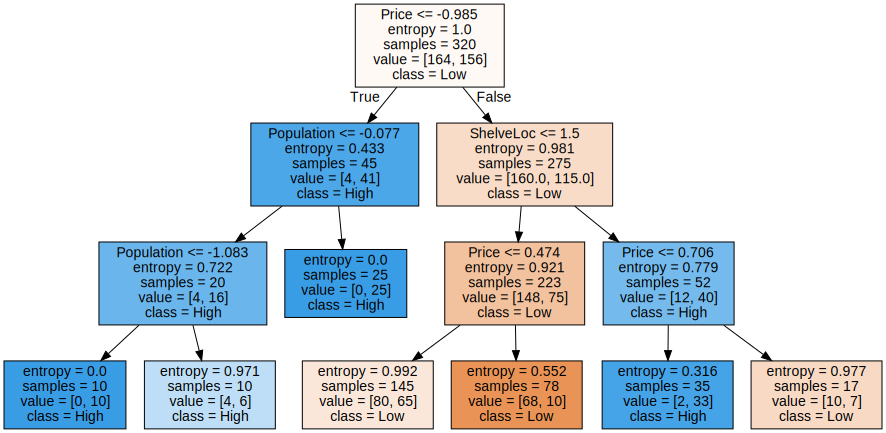

In [13]:
def viz_tree(dt_classifier, X):
    export_graphviz(dt_classifier, out_file='tree.dot', feature_names=X.columns, class_names=['Low', 'High'], filled=True)
    with open('tree.dot') as f:
        dot_graph = f.read()
    return graphviz.Source(dot_graph)

viz_tree(dt_classifier, X)

In [14]:
# using feature importance, map it to the feature names
feature_importance = pd.Series(dt_classifier.feature_importances_, index=X.columns)
feature_importance

CompPrice      0.000000
Income         0.000000
Advertising    0.000000
Population     0.102247
Price          0.649599
ShelveLoc      0.248154
Age            0.000000
Education      0.000000
Urban          0.000000
US             0.000000
dtype: float64

# Pruning

In [15]:
pruned_tree = dt_classifier.cost_complexity_pruning_path(X_train, y_train)
pruned_tree

{'ccp_alphas': array([0.        , 0.0147783 , 0.01573499, 0.04015684, 0.05770905,
        0.07405602, 0.09599269]),
 'impurities': array([0.70112122, 0.71589952, 0.7316345 , 0.77179134, 0.8295004 ,
        0.90355642, 0.99954911])}

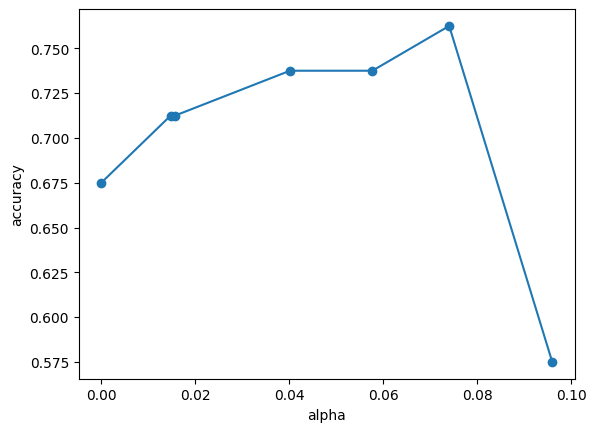

In [16]:
alphas = pruned_tree['ccp_alphas']
# find best decision tree
accuracy = []
for alpha in alphas:
    dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42, ccp_alpha=alpha)
    dt_classifier.fit(X_train, y_train)
    y_pred = dt_classifier.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

plt.plot(alphas, accuracy, marker='o')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.show()

In [17]:
best_alpha = alphas[accuracy.index(max(accuracy))]
best_dt = DecisionTreeClassifier(criterion='entropy', random_state=42, ccp_alpha=best_alpha)
best_dt.fit(X_train, y_train)
y_pred = best_dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.7625

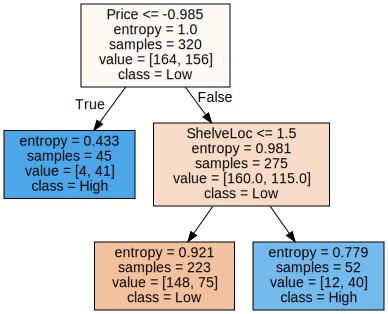

In [18]:
viz_tree(best_dt, X)

## Bagging

In [36]:
bag_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_features=X.shape[1])
bag_classifier.fit(X_train, y_train)
y_pred = bag_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.825

## Random Forest

In [37]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_features=3)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.8625

In [38]:
importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
importances

CompPrice      0.116915
Income         0.087988
Advertising    0.104083
Population     0.094799
Price          0.249888
ShelveLoc      0.126855
Age            0.138661
Education      0.055131
Urban          0.014276
US             0.011403
dtype: float64

In [39]:
bag_importances = pd.Series(bag_classifier.feature_importances_, index=X.columns)
bag_importances

CompPrice      0.138920
Income         0.072572
Advertising    0.094454
Population     0.064372
Price          0.301843
ShelveLoc      0.138969
Age            0.136964
Education      0.036188
Urban          0.009600
US             0.006118
dtype: float64

## Boosting

In [44]:
boost_classifier = GradientBoostingClassifier(n_estimators=300, random_state=42, max_depth=1, learning_rate=0.1)
boost_classifier.fit(X_train, y_train)
y_pred = boost_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.85

In [50]:
boost_importances = pd.Series(boost_classifier.feature_importances_, index=X.columns)
boost_importances

CompPrice      0.115398
Income         0.013177
Advertising    0.125655
Population     0.010584
Price          0.382781
ShelveLoc      0.233125
Age            0.118745
Education      0.000535
Urban          0.000000
US             0.000000
dtype: float64

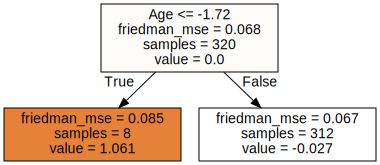

In [49]:
# visualize full boosted tree
viz_tree(boost_classifier.estimators_[-1][0], X)